In [17]:
#library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#memuat dataset

file_path = 'dataset/TABLE_TENDER11.csv'
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       130 non-null    object 
 1   X1      130 non-null    float64
 2   X2      130 non-null    float64
 3   X3      130 non-null    int64  
 4   X4      130 non-null    int64  
 5   X5      130 non-null    float64
 6   X6      130 non-null    float64
 7   X7      130 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 8.3+ KB


In [4]:
# Menampilkan beberapa baris data
print(data.head())

   Y            X1            X2  X3  X4    X5    X6    X7
0  T  4.795000e+09  4.900262e+09  15   1  0.98  0.02  39.0
1  T  5.221828e+09  5.433400e+09  15   1  0.96  0.04  50.0
2  T  2.897914e+09  2.949755e+09  13   1  0.98  0.02  54.0
3  T  2.285983e+09  2.388472e+09  33   1  0.96  0.04  36.0
4  T  9.208910e+08  9.308825e+08  27   1  0.99  0.01  36.0


In [5]:
# Memisahkan Fitur dan Label

# Memisahkan fitur dan label
X = data.drop(columns=['Y'])
y = data['Y']

# Menampilkan sekilas data fitur dan label
print(X.head())
print(y.head())

             X1            X2  X3  X4    X5    X6    X7
0  4.795000e+09  4.900262e+09  15   1  0.98  0.02  39.0
1  5.221828e+09  5.433400e+09  15   1  0.96  0.04  50.0
2  2.897914e+09  2.949755e+09  13   1  0.98  0.02  54.0
3  2.285983e+09  2.388472e+09  33   1  0.96  0.04  36.0
4  9.208910e+08  9.308825e+08  27   1  0.99  0.01  36.0
0    T
1    T
2    T
3    T
4    T
Name: Y, dtype: object


In [10]:
# Membagi Data Menjadi Data Latih dan Uji

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Melakukan Standarisasi/Penskalaan Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#melatih model KNN

from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model dengan k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
#memprediksi & mengevaluasi model

from sklearn.metrics import accuracy_score, classification_report

# Memprediksi data uji
y_pred = knn.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.7307692307692307
Laporan Klasifikasi:
               precision    recall  f1-score   support

           T       0.62      0.56      0.59         9
           Y       0.78      0.82      0.80        17

    accuracy                           0.73        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.72      0.73      0.73        26



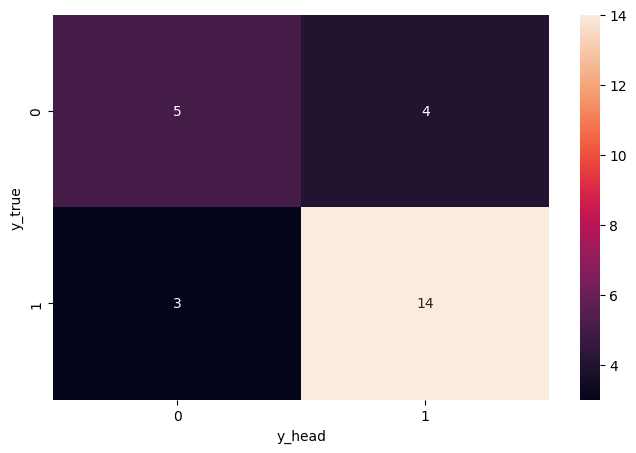

In [27]:
# evaluasi model tampilan confussion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()